<h1><center>Kmeans Clustering and Gaussian Mixture Models </center></h1>
<p align> Kmeans clustering will divide the n datapoints into k clusters in which each of the partition will belong to the cluster with the nearest mean. This is an unsupervised learning algorithm.In particular, the non-probabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations.Hence we can extend the clustering by using gausian mixture model which overcomes the drawbacks of kmeans clustering.</p>
<p align> we are going to follow the following steps in our k means and gaussian mixture models implementation.
<ul>
<li>First we are going to do kmeans clustering and divide into 3 clusters and visualise with the machine learning API</li>
<li> Then we calculate the mean, covariance and pi from the 3 clusters obtained.</li>
<li> Then we will implement EM gaussian model and use the parameters obtained from the k means</li>
<li> Then we run our EM on our datapoints and visulaize the model</li>
<li> Then we visualise the gaussian mixture model of ours and machine learning API</li>
</ul>


In [1]:
#import packages necessary for program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
import math
from scipy.stats import multivariate_normal
import sklearn
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

<p align> For our implementation, we are considering xclara, a bivariate dataset which consists of 3000 datapoints with two coordinates v1 and v2 respectively.</p>

In [2]:
#read CSV file 
df=pd.read_csv("/home/sathyanarayanan/xclara.csv")
df.shape
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


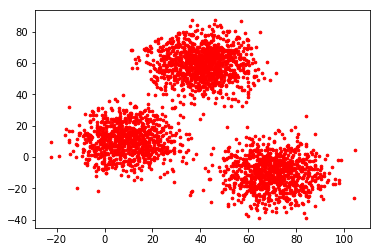

In [3]:
#plot the initial points
f1 = df['V1'].values
f2 = df['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)
plt.show()

<center><h3> Kmeans Clustering</h3></center>
<p> We have implemented kmeans algorithm as follows, assuming that we have inputs x1,x2,x3,…,x and value of K.
<ul>
<li> Step 1:We randomly pick K cluster centers(centroids). Let’s assume these are c1,c2,…,ck and we can say that

<center>C=c1,c2,…,ck</center>
C is the set of all centroids.</li><br>
<li>Step 2: In this step we assign each input value to closest center. This is done by calculating Euclidean(L2) distance between the point and the each centroid.<br>
                        <center>argmin<sub>c<sub>i</sub>∈C</sub>dist(ci,x)<sup>2</sup> </center><br>
<li>Step 3:In this step, we find the new centroid by taking the average of all the points assigned to that cluster.<br>
<center>c<sub>i</sub>=1/|S<sub>i</sub>|∑<sub>x<sub>i</sub>∈S<sub>i</sub></sub>x<sub>i</sub></center><br>
Si is the set of all points assigned to the ith cluster.</li><br>
<li>Step 4:In this step, we repeat step 2 and 3 until none of the cluster assignments change. That means until our clusters remain stable, we repeat the algorithm.</li>

In [4]:
# Euclidean Distance Caculator function
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

<p align> We iterate our algorithm 10 times to get the average cluster centroids. Each time we initialise centroids at random positions. We create clusters array, which calculates the index of minimum distance of each point from the centroids. </p>
<p align> We then take the mean of those points belonging to same the index to obtain new cluster centroid. We then iterate the procedure till the distance between points and centroids stabilize.</p>

In [5]:
C_0=[]
C_1=[]
C_2=[]
for i in range(10):
    # Number of clusters
    k = 3
    # X coordinates of random centroids
    C_x = np.random.randint(0, np.max(X)-20, size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(0, np.max(X)-20, size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    #initialise clusters which holds the index of smallest distance points
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
        #appending each cluster centroids for 10 iterations into independent list
    C_0.append(C[0])
    C_1.append(C[1])
    C_2.append(C[2])

In [6]:
C_0

[array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32)]

In [7]:
#mean of 1st cluster
C_0=np.asarray(C_0)
mean_C_0=np.mean(C_0,axis=0)
mean_C_0

array([ 39.89762115,  12.16974163], dtype=float32)

In [8]:
C_1

[array([  9.47804546,  10.68605232], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32),
 array([ 69.92418671, -10.1196413 ], dtype=float32)]

In [9]:
#mean of 2nd cluster
C_1=np.asarray(C_1)
mean_C_1=np.mean(C_1,axis=0)
mean_C_1

array([ 51.98684692,   8.00860405], dtype=float32)

In [10]:
C_2

[array([ 40.68362808,  59.71589279], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32),
 array([  9.47804546,  10.68605232], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32),
 array([ 40.68362808,  59.71589279], dtype=float32)]

In [11]:
#mean of 3rd cluster
C_2=np.asarray(C_2)
mean_C_2=np.mean(C_2,axis=0)
mean_C_2

array([ 28.20139503,  40.10395432], dtype=float32)

In [12]:
#putting all the mean clustered values in array
new_C=np.array([mean_C_0,mean_C_1,mean_C_2])
new_C

array([[ 39.89762115,  12.16974163],
       [ 51.98684692,   8.00860405],
       [ 28.20139503,  40.10395432]], dtype=float32)

<p align> taking the mean centroid values and performing the same implementation again </p>

In [13]:
# To store the value of centroids when it updates
C_old_final = np.zeros(new_C.shape)

clusters_final = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error_final = dist(new_C, C_old_final, None)
# Loop will run till the error becomes zero
while error_final != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], new_C)
        cluster = np.argmin(distances)
        clusters_final[i] = cluster
    # Storing the old centroid values
    C_old_final = deepcopy(new_C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points_final = [X[j] for j in range(len(X)) if clusters_final[j] == i]
        new_C[i] = np.mean(points_final, axis=0)
    error_final = dist(new_C, C_old_final, None)

<p align> plotting the graph of our implementation. Star in the graph denotes the cluster centroids and the data points are clustered into cluster points </p>

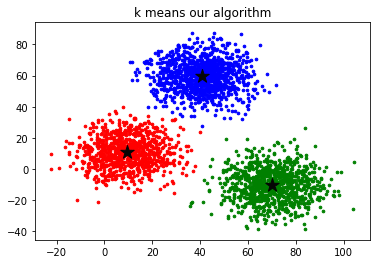

In [14]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points_final = np.array([X[j] for j in range(len(X)) if clusters_final[j] == i])
        ax.scatter(points_final[:, 0], points_final[:, 1], s=7, c=colors[i])
ax.scatter(new_C[:, 0], new_C[:, 1], marker='*', s=200, c='#050505')
plt.title("k means our algorithm")
plt.show()

<p align><b>We Implement the kmeans machine learning API to visualise the clusters.</b></p> 

In [15]:
kmeans=KMeans(n_clusters=3)
kmeans=kmeans.fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
#cluster centroids
centroid=kmeans.cluster_centers_

<p align>plotting the graph for machine learning API</p>

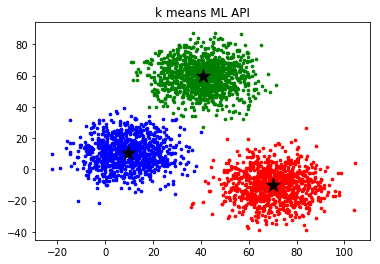

In [17]:
colors_ml = ['r', 'g', 'b', 'y', 'c', 'm']
fig_ml, ax_ml = plt.subplots()
for i in range(3):
    points_final_ml = np.array([X[j] for j in range(len(X)) if kmeans.labels_[j] == i])
    ax_ml.scatter(points_final_ml[:, 0], points_final_ml[:, 1], s=7, c=colors[i])
ax_ml.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, c='#050505')
plt.title("k means ML API")
plt.show()    


<p align>For implementing gaussian mixture models, we need to give the mean cluster centroids from k means, covariance of cluster data points and pi values (probability of cluster points in the clusters) from k means.</p>
<p align>So we calculate pi and covariance from k means result, mean is the k means cluster centroids.</p>

In [18]:
finalcount_k1=np.array([X[j] for j in range(len(X)) if clusters_final[j] == 0])    
pi_1=round(len(finalcount_k1)/len(X),2)
pi_1

0.3

In [19]:
finalcount_k2=np.array([X[j] for j in range(len(X)) if clusters_final[j] == 1])
pi_2=round(len(finalcount_k2)/len(X),2)
pi_2

0.32

In [20]:
finalcount_k3=np.array([X[j] for j in range(len(X)) if clusters_final[j] == 2])
pi_3=round(len(finalcount_k3)/len(X),2)
pi_3

0.38

In [21]:
#taking transpose of cluster points and then finding covariances
cl1=finalcount_k1.T
covar1=np.cov(cl1)
cl2=finalcount_k2.T
covar2=np.cov(cl2)
cl3=finalcount_k3.T
covar3=np.cov(cl3)
covariance=np.array([covar1,covar2,covar3])

In [22]:
#array containing pi values
pi=np.array([pi_1,pi_2,pi_3])
pi

array([ 0.3 ,  0.32,  0.38])

In [23]:
means=new_C
means

array([[  9.47804546,  10.68605232],
       [ 69.92418671, -10.1196413 ],
       [ 40.68362808,  59.71589279]], dtype=float32)

In [24]:
covariance

array([[[ 103.96243033,    3.34190299],
        [   3.34190299,   96.1837673 ]],

       [[ 109.48397634,   -0.31492123],
        [  -0.31492123,  106.60518593]],

       [[ 103.25448164,   -1.92097408],
        [  -1.92097408,   93.93524127]]])


<h3><center>Implementing the EM algorithm for Gaussian mixture models</center></h3>
<p align>Now we are going to implement EM algorithm by using the paramenters obtained from kmeans clustering.The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step.We will follow the following steps:
<ul>
<li>Provide a log likelihood function for this model.</li>
<li>Implement the E-step algorithm.</li>
<li>Implement the M-step algorithm</li>
<li> Then we use our datapoints to Visualize the progress of the parameters during the course of running EM.</li></ul>

<h3>Log likelihood</h3>
<p align>For the mixture of guassians, we will give a function which will calculate the log likelihood. The log likelihood function will quantify the probability of a given set of data under a particular setting of the parameters in our implementation.</p>

In [25]:
def log_sum_exp(Z):
    """ Compute log(\sum_i exp(Z_i)) for some array Z."""
    return np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))

def loglikelihood(data, weights, means, covs):
    """ Compute the loglikelihood of the data for a Gaussian mixture model with the given parameters. """
    num_clusters = len(means)
    num_dim = len(data[0])
    
    ll = 0
    for d in data:
        
        Z = np.zeros(num_clusters)
        for k in range(num_clusters):
            
            # Compute (x-mu)^T * Sigma^{-1} * (x-mu)
            delta = np.array(d) - means[k]
            exponent_term = np.dot(delta.T, np.dot(np.linalg.inv(covs[k]), delta))
            
            # Compute loglikelihood contribution for this data point and this cluster
            Z[k] += np.log(weights[k])
            Z[k] -= 1/2. * (num_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k])) + exponent_term)
            
        # Increment loglikelihood contribution of this data point across all clusters
        ll += log_sum_exp(Z)
        
    return ll

<h4>E-step: To assign cluster responsibilities by using current parameters</h4>
<p align>E-step is the first step in the EM algorithm and is used to calculate the cluster responsibilities. If r denotes the cluster responsibility $k$ for data point $i$. The sum of all cluster responsibilities of a single data point should be 1.
$$r_{i1} + r_{i2} + \ldots + r_{iK} = 1$$
Next, we compute the data point likelihood under the particular cluster assignment, multiplied by the weight of the cluster. This is done to find out how much a cluster influences a given data point. For data point $i$ and cluster $k$, likelihood is 
$$r_{ik} \propto \pi_k N(x_i | \mu_k, \Sigma_k)$$
where $N(x_i | \mu_k, \Sigma_k)$ is the Gaussian distribution for cluster $k$ (with mean $\mu_k$ and covariance $\Sigma_k$).
All the responsibilities over each data point should add up to 1, so we use the normalization constant in the denominator: 
$$r_{ik} = \frac{\pi_k N(x_i | \mu_k, \Sigma_k)}{\sum_{k=1}^{K} \pi_k N(x_i | \mu_k, \Sigma_k)}.$$
The following function computes $r_{ik}$ for all data points $i$ and clusters $k$.

multivariate_normal.pdf function is provided by SciPy and it computes the likelihood of a data point in a multivariate Gaussian distribution.

In [26]:
def compute_responsibilities(data, weights, means, covariances):
    #E-step: compute responsibilities, given the current parameters
    num_data = len(data)
    num_clusters = len(means)
    resp = np.zeros((num_data, num_clusters))
    
    # Update resp matrix so that resp[i,k] is the responsibility of cluster k for data point i.
    # Hint: To compute likelihood of seeing data point i given cluster k, use multivariate_normal.pdf.
    for i in range(num_data):
        for k in range(num_clusters):
            resp[i, k] = weights[k]*multivariate_normal.pdf(data[i],mean=means[k],cov=covariances[k])
    
    # Add up responsibilities over each data point and normalize
    row_sums = resp.sum(axis=1)[:, np.newaxis]
    resp = resp / row_sums
    
    return resp
    
    


<h4>M-step:Update parameters using the current cluster responsibilities.</h4>
The parameters (weights, means, and covariances) associated with the clusters are updated once the cluster responsibilities are computed.
Before updating the parameters, we first compute the "soft counts". The soft count of a cluster is the sum of all cluster responsibilities for that cluster and is given by: 
$$N^{\text{soft}}_k = r_{1k} + r_{2k} + \ldots + r_{Nk} = \sum_{i=1}^{N} r_{ik}$$
Here, we loop over every single data point in the dataset because all the clusters are represented in all data points, to a varying degree.</p>

In [27]:
def compute_soft_counts(resp):
    # Compute the total responsibility assigned to each cluster, which will be useful when 
    # implementing M-steps below.
    counts = np.sum(resp, axis=0)
    return counts

<p align>Updating weights. 
The weight of cluster $k$ is given by the ratio of the soft count $N^{\text{soft}}_{k}$ to the total number of data points $N$: 
$$\hat{\pi}_k = \frac{N^{\text{soft}}_{k}}{N}$$ 
where $N$ is the sum over the soft counts $N^{\text{soft}}_{k}$ of all clusters.</p>

In [28]:
def compute_weights(counts):
    num_clusters = len(counts)
    weights = [0.] * num_clusters
    
    for k in range(num_clusters):
        # Update the weight for cluster k using the M-step update rule for the cluster weight, \hat{\pi}_k.
        # HINT: compute # of data points by summing soft counts.
       
        weights[k] = counts[k]/np.sum(counts)

    return weights

In [29]:
def compute_means(data, resp, counts):
    num_clusters = len(counts)
    num_data = len(data)
    means = [np.zeros(len(data[0]))] * num_clusters
    
    for k in range(num_clusters):
        # Update means for cluster k using the M-step update rule for the mean variables.
        # This will assign the variable means[k] to be our estimate for \hat{\mu}_k.
        weighted_sum = 0.
        for i in range(num_data):
           
            weighted_sum += resp[i,k]*data[i]
        
        means[k] = weighted_sum/counts[k]

    return means

<p align>Updating covariances. The covariance of each cluster is set to the weighted average of all matrix products, weighted by the cluster responsibilities: 
$$\hat{\Sigma}_k = \frac{1}{N^{\text{soft}}_k}\sum_{i=1}^N r_{ik} (x_i - \hat{\mu}_k)(x_i - \hat{\mu}_k)^T$$
<br>
$$(x_i - \hat{\mu}_k)(x_i - \hat{\mu}_k)^T.$$ 
Say $(x_i - \hat{\mu}_k)$ is a $d \times 1$ column vector, this product is a $d \times d$ matrix. Taking the weighted average of all outer products gives us the covariance matrix, which is also $d \times d$.</p>

In [30]:
def compute_covariances(data, resp, counts, means):
    num_clusters = len(counts)
    num_dim = len(data[0])
    num_data = len(data)
    covariances = [np.zeros((num_dim,num_dim))] * num_clusters
    
    for k in range(num_clusters):
        # Update covariances for cluster k using the M-step update rule for covariance variables.
        # This will assign the variable covariances[k] to be the estimate for \hat{\Sigma}_k.
        weighted_sum = np.zeros((num_dim, num_dim))
        for i in range(num_data):
            
            weighted_sum += resp[i,k]*np.outer(data[i]-means[k],data[i]-means[k])
        
        covariances[k] = weighted_sum/counts[k]

    return covariances

In [31]:
# Main method of EM algorithm
def EM(data, init_means, init_covariances, init_weights, maxiter=1000, thresh=1e-4):
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    
    # Infer dimensions of dataset and the number of clusters
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    
    # Initialize some useful variables
    resp = np.zeros((num_data, num_clusters))
    ll = loglikelihood(data, weights, means, covariances)
    ll_trace = [ll]
    
    for it in range(maxiter):
        if it % 5 == 0:
            print("Iteration %s" % it)
        
        # E-step: compute responsibilities
        resp = compute_responsibilities(data, weights, means, covariances)

        # M-step
        # Compute the total responsibility assigned to each cluster, which will be useful when 
        # implementing M-steps below. In the lectures this is called N^{soft}
        counts = compute_soft_counts(resp)
        
        # Update the weight for cluster k using the M-step update rule for the cluster weight, \hat{\pi}_k.
        
        weights = compute_weights(counts)
        
        # Update means for cluster k using the M-step update rule for the mean variables.
        # This will assign the variable means[k] to be our estimate for \hat{\mu}_k.
        
        means = compute_means(data, resp, counts)
        
        # Update covariances for cluster k using the M-step update rule for covariance variables.
        # This will assign the variable covariances[k] to be the estimate for \hat{\Sigma}_k.
        
        covariances = compute_covariances(data, resp, counts, means)
        
        # Compute the loglikelihood at this iteration
        
        ll_latest = loglikelihood(data, weights, means, covariances)
        ll_trace.append(ll_latest)
        
        # Check for convergence in log-likelihood and store
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            break
        ll = ll_latest
    
    if it % 5 != 0:
        print("Iteration %s" % it)
    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'loglik': ll_trace, 'resp': resp}

    return out

In [32]:
# Run EM 
results = EM(X, means, covariance, pi)

Iteration 0
Iteration 2


<p align> This shows that after 2 iterations the log likelihood cease to increase </p>

<p align> We get the output mean, covariance and pi values </p>

In [33]:
results['weights']

[0.29948923088554025, 0.31757554769157331, 0.38293522142288633]

In [34]:
results['means']

[array([  9.46498512,  10.71374154]),
 array([ 69.89392263, -10.1123221 ]),
 array([ 40.68598467,  59.70962128])]

In [35]:
results['covs']

[array([[ 103.71811772,    3.84097886],
        [   3.84097886,   96.80757463]]),
 array([[ 110.43882113,   -0.60363927],
        [  -0.60363927,  106.47509081]]),
 array([[ 103.11407014,   -1.82552684],
        [  -1.82552684,   94.2897195 ]])]

<p align> We plot the graph, to show the clustering in our algorithm. </p>
<p align> We use meshgrid to form a mesh and then plot the clusters. We get a good graph showing the result </p>

In [36]:
import matplotlib.mlab as mlab
def plot_contours(data, means, covs, title):
    plt.figure()
    plt.plot([x[0] for x in data], [y[1] for y in data],'o',c='k',alpha=0.3,markersize=1) # data

    delta = 5
    k = len(means)
    x = np.arange(-40,100, delta)
    y = np.arange(-40,100, delta)
    X, Y = np.meshgrid(x, y)
    col = ['r','g','b']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        Z = mlab.bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, Z, colors = col[i])
        plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()

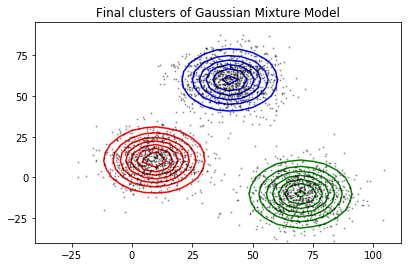

In [37]:
plot_contours(X, results['means'], results['covs'], 'Final clusters of Gaussian Mixture Model')

<p align> We are using machine learning API for gaussian mixture model to verify our result. We also plot the graph. It is pretty close to our implementation </p>

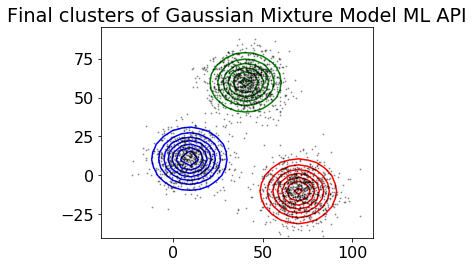

In [38]:
#Using the Machine Learning API
gmm = sklearn.mixture.GaussianMixture(n_components=3, covariance_type='full',init_params='kmeans').fit(X)
plot_contours(X, gmm.means_, gmm.covariances_, 'Final clusters of Gaussian Mixture Model ML API')